# FiftyOne Quickstart

This notebook provides a brief walkthrough of FiftyOne, highlighting features that will help you build better datasets and models for your CV/ML projects.

It will cover:
- Loading a dataset in FiftyOne
- Using FiftyOne in a notebook
- Exploring the dataset by looking at different views
- Debugging model predictions in FiftyOne
- Debugging dataset annotations in FiftyOne

## Install FiftyOne

In [ ]:
!pip install fiftyone

## Load a dataset

Let's get started by importing the FiftyOne library:

In [1]:
import fiftyone as fo

FiftyOne provides a number of helpful data/model resources to get you up and running on your projects. In this example, we'll load a dataset from the [FiftyOne Dataset Zoo](https://voxel51.com/docs/fiftyone/user_guide/dataset_zoo/index.html).

The command below downloads a small detection dataset from the web and loads it into a [FiftyOne Dataset](https://voxel51.com/docs/fiftyone/user_guide/basics.html) that we'll use to explore the capabilities of FiftyOne.

In [2]:
import fiftyone.zoo as foz

dataset = foz.load_zoo_dataset("quickstart")

 100% |██████████████████████████|  188.0Mb/188.0Mb [747.3ms elapsed, 0s remaining, 251.6Mb/s]      
Extracting dataset...
Parsing dataset metadata
Found 200 samples
Dataset info written to '/Users/Voxel51/fiftyone/quickstart/info.json'
Loading 'quickstart'
 100% |██████████████████████████| 200/200 [5.8s elapsed, 0s remaining, 27.3 samples/s]      
Dataset 'quickstart' created


In [3]:
print(dataset)

Name:           quickstart
Media type:     image
Num samples:    200
Persistent:     False
Info:           {}
Tags:           ['validation']
Sample fields:
    filepath:     fiftyone.core.fields.StringField
    tags:         fiftyone.core.fields.ListField(fiftyone.core.fields.StringField)
    metadata:     fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.metadata.Metadata)
    ground_truth: fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)
    uniqueness:   fiftyone.core.fields.FloatField
    predictions:  fiftyone.core.fields.EmbeddedDocumentField(fiftyone.core.labels.Detections)


Now let's launch the [FiftyOne App](https://voxel51.com/docs/fiftyone/user_guide/app.html) so we can explore the dataset visually. Right away you will see that because we are in a notebook, an embedded instance of the App with our dataset loaded has been rendered in the cell's output.

The [`Session`](https://voxel51.com/docs/fiftyone/api/fiftyone.core.session.html#fiftyone.core.session.Session) object created below is a bi-directional connection between your Python kernel and the FiftyOne App, as we'll see later.


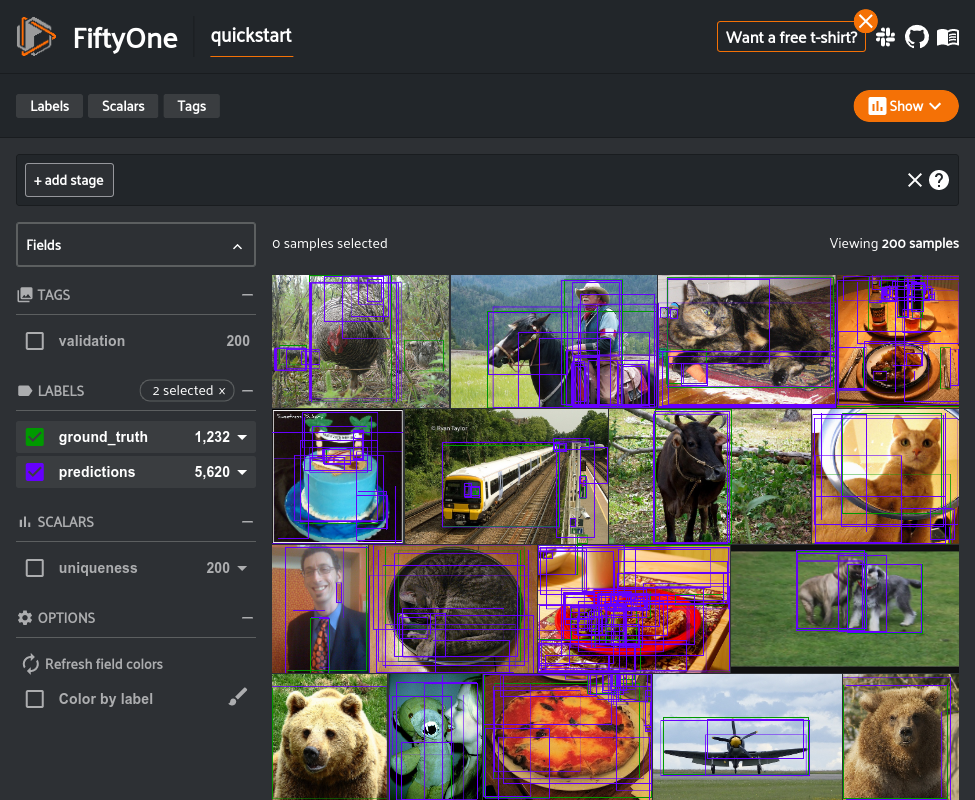

In [4]:
session = fo.launch_app(dataset)

## Automatic screenshots as you work

Notebooks are great for many reasons, one of which is the ability to share your work with others. FiftyOne is designed to help you write notebooks that capture your work on visual datasets, using a feature we call **automatic screenshotting**.

Whenever you open a new App instance in a notebook cell, e.g., by updating your [`Session`](https://voxel51.com/docs/fiftyone/api/fiftyone.core.session.html#fiftyone.core.session.Session) object, any previous App instances will be automatically replaced with a static screenshot. In fact, that's what you're seeing below; screenshots of the Apps we opened when we created this notebook!

The cell below issues a [`session.show()`](https://voxel51.com/docs/fiftyone/api/fiftyone.core.session.html#fiftyone.core.session.Session.show) command, which opens a new App instance in the cell's output. When you run the cell for yourself, notice that the App instance in the previous cell is automatically replaced with a screenshot of its current state. You can reactivate old App instances by hovering over them and clicking anywhere.

After running the cell below, try double-clicking on an image in the grid to expand the sample.


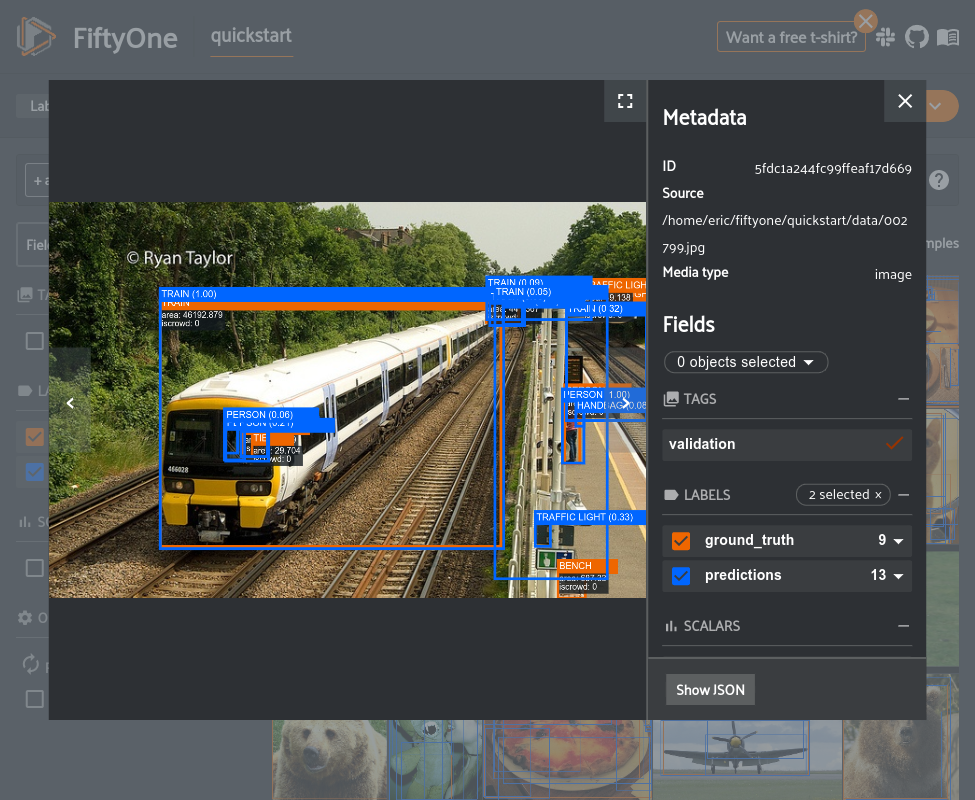

In [5]:
session.show()

## Dataset Views

The power of FiftyOne truly comes alive when using [dataset views](https://voxel51.com/docs/fiftyone/user_guide/using_views.html).

Think of a [`Dataset`](https://voxel51.com/docs/fiftyone/api/fiftyone.core.dataset.html#fiftyone.core.dataset.Dataset) as the root view into your all of your data. Creating a [`DatasetView`](https://voxel51.com/docs/fiftyone/api/fiftyone.core.view.html#fiftyone.core.view.DatasetView) allows you to study a specific subset of the samples and/or fields of your dataset.

Dataset views can be created and modified both in Python and in the App. The active view in the App is always available via the [`Session.view`](https://voxel51.com/docs/fiftyone/api/fiftyone.core.session.html#fiftyone.core.session.Session.view) property of your session. If you update your view in the App, its state will be captured by [`Session.view`](https://voxel51.com/docs/fiftyone/api/fiftyone.core.session.html#fiftyone.core.session.Session.view). Or, you can create a view programmatically in Python and open it in the App by setting the [`Session.view`](https://voxel51.com/docs/fiftyone/api/fiftyone.core.session.html#fiftyone.core.session.Session.view) property.

Let's start by creating a view into our dataset via the App. We'll sort the dataset by the `uniqueness` field in reverse. To do this, we will click `+ add stage` in the View Bar and add a `SortBy` stage with `uniqueness` as the field, and `reverse` equal to `True`.


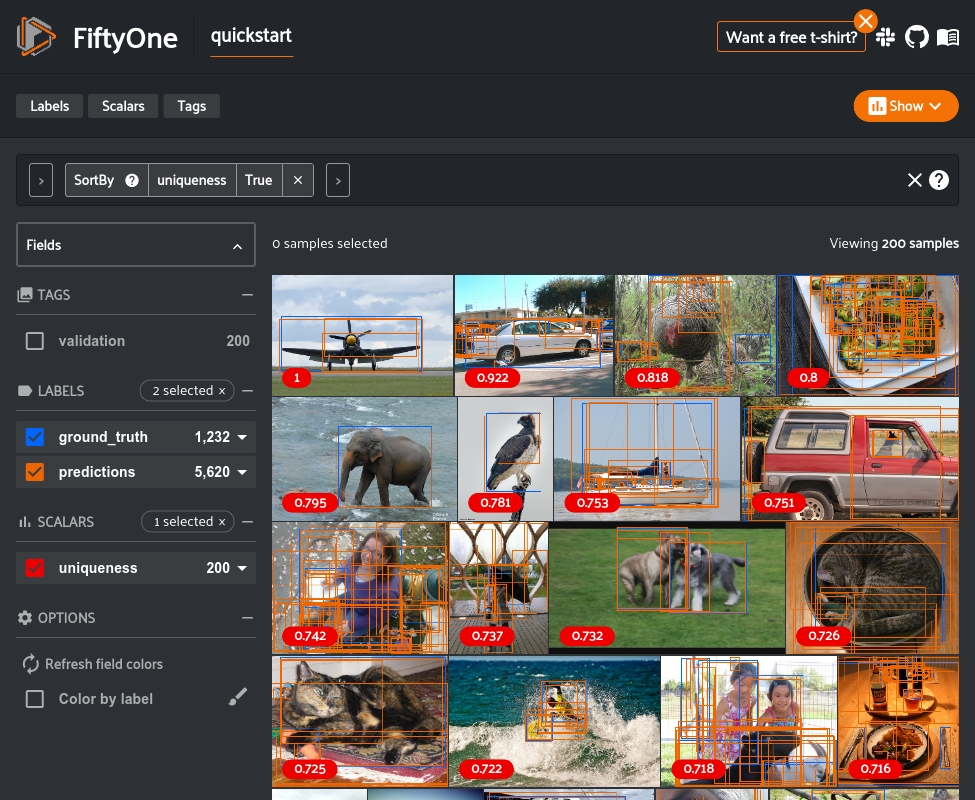

In [6]:
session.show()

We can then access the view in Python and, for example, print the most unique [Sample](https://voxel51.com/docs/fiftyone/api/fiftyone.core.sample.html):

In [7]:
print(session.view.first())

<SampleView: {
    'id': '5fdc1a244fc99ffeaf17d7f5',
    'media_type': 'image',
    'filepath': '/home/eric/fiftyone/quickstart/data/003486.jpg',
    'tags': BaseList(['validation']),
    'metadata': None,
    'ground_truth': <Detections: {
        'detections': BaseList([
            <Detection: {
                'id': '5f452482ef00e6374aacf803',
                'attributes': BaseDict({
                    'area': <NumericAttribute: {'value': 23541.39925000001}>,
                    'iscrowd': <NumericAttribute: {'value': 0.0}>,
                }),
                'label': 'airplane',
                'bounding_box': BaseList([
                    0.05365625,
                    0.34533957845433255,
                    0.769828125,
                    0.45049180327868854,
                ]),
                'mask': None,
                'confidence': None,
                'index': None,
            }>,
        ]),
    }>,
    'uniqueness': 1.0,
    'predictions': <Detections: {
       

## Complex views in Python

Sometimes you may be interested in creating a [complex view](https://voxel51.com/docs/fiftyone/user_guide/using_views.html#view-stages) into a dataset that is specified by a series of conditions or complex filtering operations.

You can achieve this in FiftyOne by [chaining view stages](https://voxel51.com/docs/fiftyone/user_guide/using_views.html#tips-tricks) together to define the view you want.

As an example, let's create a view that contains only the 25 most unique samples in the dataset, and only predictions on those samples with confidence greater than `0.8`.

Remember that, because we are working in a notebook, any time we change our [`Session`](https://voxel51.com/docs/fiftyone/api/fiftyone.core.session.html#fiftyone.core.session.Session) object, a new App will be displayed in the cell's output.


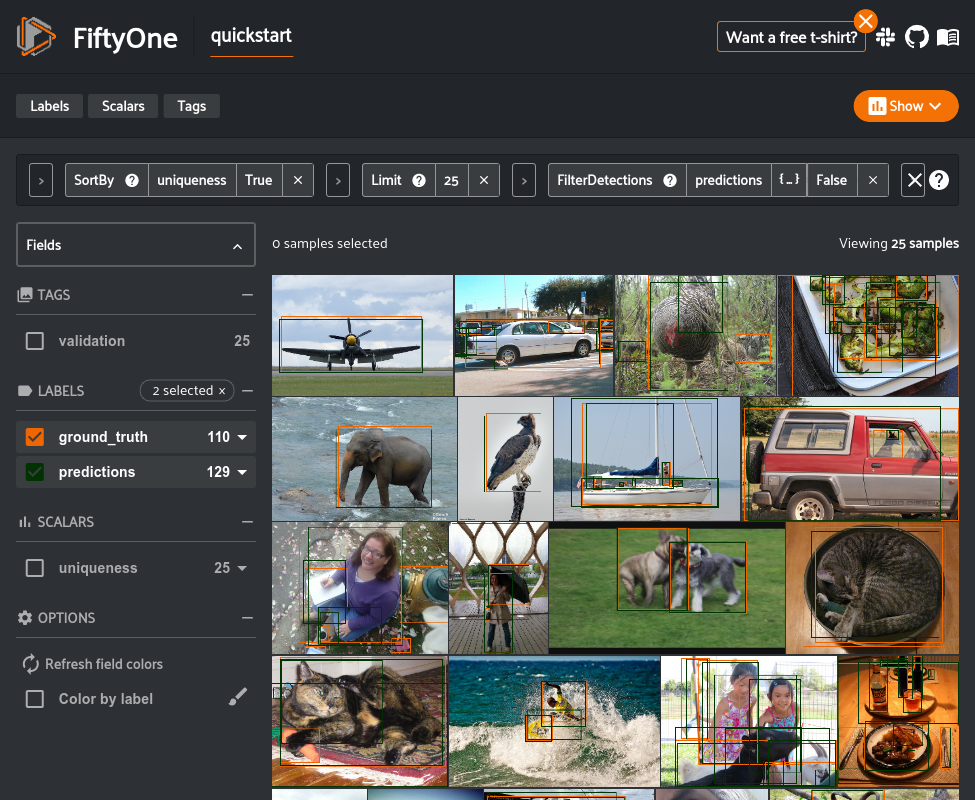

In [8]:
from fiftyone import ViewField as F

session.view = (
    dataset
    .sort_by("uniqueness", reverse=True)
    .limit(25)
    .filter_detections("predictions", F("confidence") > 0.5)
)

## Debugging your model

A primary use case of FiftyOne is being able to easily visualize and explore your model predictions to find failure cases that need to be addressed to improve performance.

We have added `predictions` to the `quickstart` dataset. You can also [add your own model predictions](https://voxel51.com/docs/fiftyone/recipes/model_inference.html) for a variety of tasks including [classification, detection, instance/semantic segmentation, keypoints, and more](https://voxel51.com/docs/fiftyone/user_guide/using_datasets.html#labels).

If you don't have your own model, you can check out the [FiftyOne model zoo](https://voxel51.com/docs/fiftyone/user_guide/model_zoo/index.html#fiftyone-model-zoo) to immediately download and generate predictions on a model.

Once you add predictions to your dataset, you can then evaluate it in FiftyOne. In this example, we will be evaluating the object detection predictions added to the `quickstart` dataset.

In [9]:
import fiftyone.utils.eval as foue

high_conf_view = dataset.filter_detections("predictions", F("confidence") > 0.75)

foue.evaluate_detections(high_conf_view, pred_field="predictions", gt_field="ground_truth")

Evaluating detections...
 100% |████████████████████████████████████████████████████████████████| 200/200 [4.0s elapsed, 0s remaining, 37.6 samples/s]      


The [`evaluate_detections`](https://voxel51.com/docs/fiftyone/api/fiftyone.utils.eval.coco.html?highlight=evaluate%20detections#fiftyone.utils.eval.coco.evaluate_detections) function will use COCO-style object detection evaluation to compute the number of true positives, false positives, and false negatives in every sample.


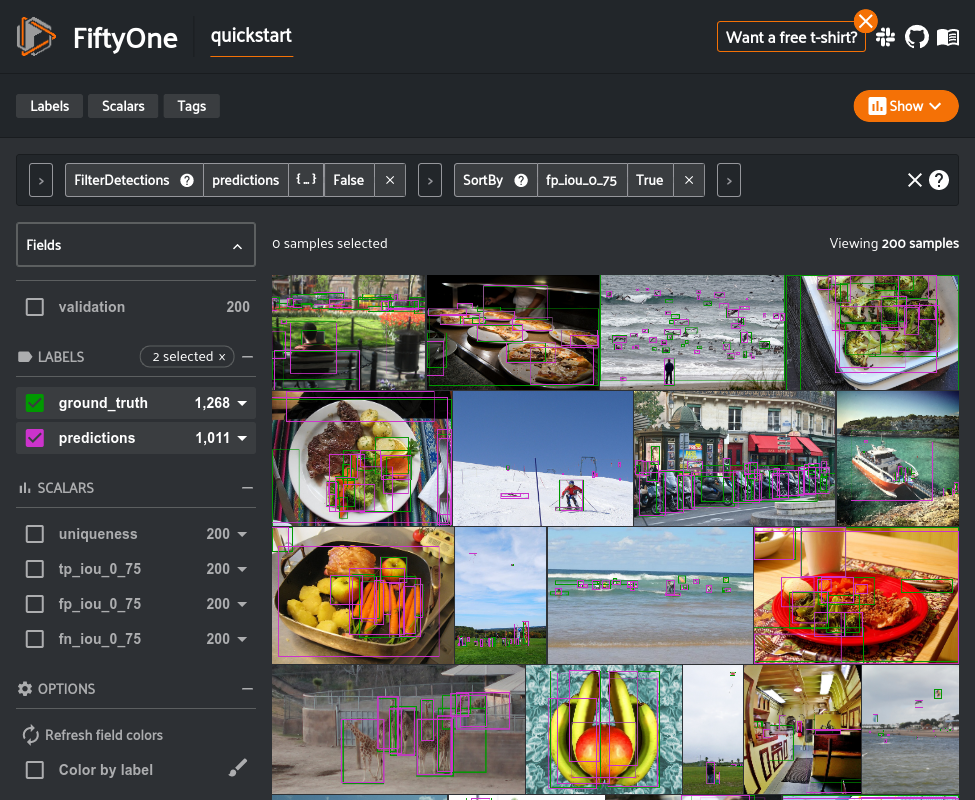

In [10]:
fp_view = high_conf_view.sort_by("fp_iou_0_75", reverse=True)
session.view = fp_view

You can see that the samples with the most number of false positives are crowded scenes indicating that we should change our training scheme/dataset to better account for crowds of objects.

This is just one form of evaluation that can be done with FiftyOne, see our [tutorials](https://voxel51.com/docs/fiftyone/tutorials/index.html) and [blog posts](https://medium.com/voxel51/fifteen-with-fiftyone/home) for more examples of debugging different kinds of models.

## Debugging your dataset

Another core use case of FiftyOne is to load and explore your dataset and annotations to get a feel for your data distribution and annotation quality.

Aside from the ability to write your own queries to understand you dataset better, for example looking at all samples that contain small objects, the [FiftyOne Brain](https://voxel51.com/docs/fiftyone/user_guide/brain.html#fiftyone-brain) provides methods that can help you gather insights about your dataset automatically. 

The FiftyOne Brain currently supports computing:
- [Uniqueness](https://voxel51.com/docs/fiftyone/user_guide/brain.html#image-uniqueness) - A score comparing similarity in the content of images or image patches with all others in the dataset
- [Mistakenness](https://voxel51.com/docs/fiftyone/user_guide/brain.html#label-mistakes) - (Classifications, Detections) A score representing the liklihood of mistakenness for a given label
- [Hardness](https://voxel51.com/docs/fiftyone/user_guide/brain.html#sample-hardness) - A score representing how hard a sample is to train on allowing you to easily mine hard samples for your training set

For this example we will be using `quickstart` dataset which is a subset of [COCO-2017](https://cocodataset.org/) with annotations from that dataset. We will be computing the mistakenness of these annotations using the model predictions added to the `quickstart`.

In [11]:
import fiftyone.brain as fob

fob.compute_mistakenness(dataset, pred_field="predictions", label_field="ground_truth", use_logits=False)

Evaluating detections...
 100% |████████████████████████████████████████████████████████████████| 200/200 [5.6s elapsed, 0s remaining, 28.7 samples/s]      
Computing mistakenness...
 100% |████████████████████████████████████████████████████████████████| 200/200 [4.8s elapsed, 0s remaining, 32.5 samples/s]       
Mistakenness computation complete


You can now view some of the `ground_truth` annotations that were flagged as possible mistakes to see if we should fix any of them.


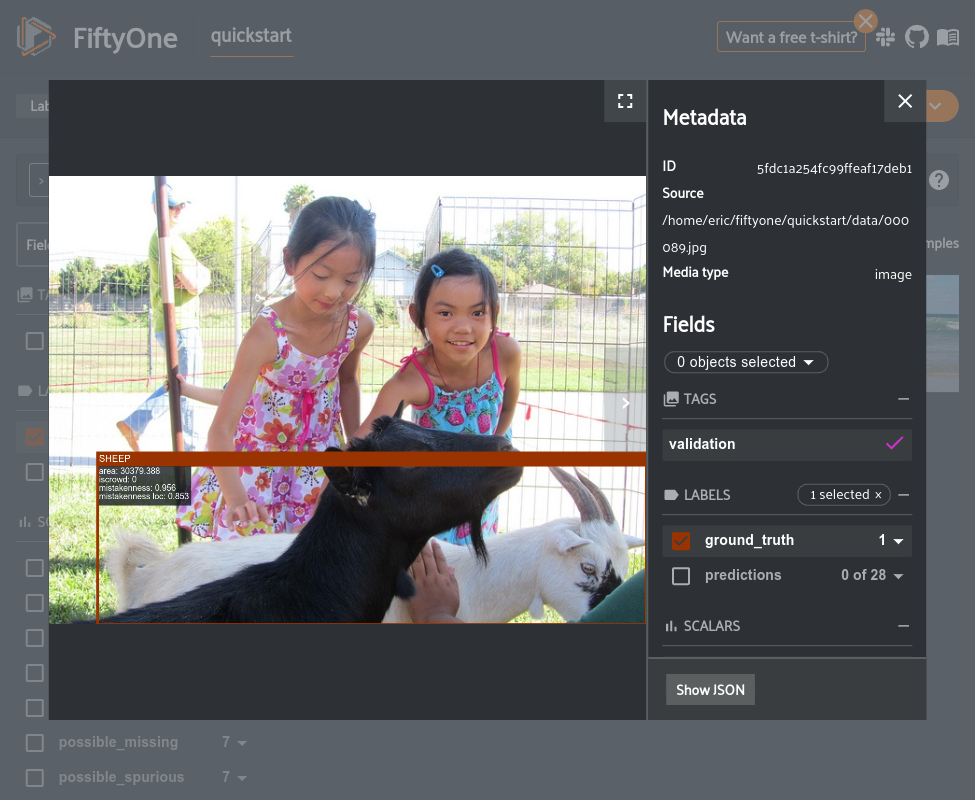

In [12]:
session.view = dataset.filter_detections(
    "ground_truth", F("mistakenness") > 0.95, only_matches=True
)

`mistakenness` is computed using the confidence of predictions from a given model. The model used to generate these `predictions` was Faster-RCNN which is pretty old at this point. Better models will result in better `mistakenness` scores.

## Sharing notebooks

To make a notebook ready for sharing, you'll need to screenshot the currently active App by calling [`Session.freeze()`](https://voxel51.com/docs/fiftyone/api/fiftyone.core.session.html#fiftyone.core.session.Session.freeze):

In [13]:
session.freeze()

Now when you share this notebook, publish it online, etc., all of your App outputs will be available for readers to see when they first open the notebook.

## Further reading

This quickstart touched on only a few of the possibilities of using FiftyOne. If you'd like to learn more, check out the [FiftyOne Tutorials](https://voxel51.com/docs/fiftyone/tutorials/index.html) and [FiftyOne Recipes](https://voxel51.com/docs/fiftyone/recipes/index.html) to see more concrete use cases and best practices.

And did we mention that FiftyOne is open source? Check out the project on GitHub at https://github.com/voxel51/fiftyone and [leave an issue](https://github.com/voxel51/fiftyone/issues/new/choose) if you think something is missing.

Thanks for tuning in!